In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

### 데이터 불러오기

In [2]:
with open('./원본데이터/2022_12.txt', 'r', encoding='utf-8') as f:
    content = f.read()

In [3]:
filtered_content = content.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','')

### 한국어

In [4]:
import konlpy
Okt = konlpy.tag.Okt()
Okt_morphs = Okt.pos(filtered_content)  # 튜플반환

In [5]:
kor = []
for word, pos in Okt_morphs:
    if pos == 'Noun':
        kor.append(word)

In [6]:
kor_stopwords = ['한국', '것', '그', '수', '이', '말', '세계', '문화', '위', '전', '의', '우리', '중', '등', '사람', '대한', '위해', '가장', '그룹', '더', '팬', '팀',
                 '시작', '자신', '다른', '고', '개', '행사', '이번', '일본', '멤버', '두', '명', '강', '로', '때', '문화원', '모든', '통해', '후', '및', '은', '함', '명의'
                 , '대해', '때문', '동안', '세', '시간', '아시아', '이야기', '하나', '지난', '최고', '개최', '예정', '매우', '또한', '점', '첫', '국제', '올해', '그녀', '일',
                 '기록', '생각', '사랑', '를', '제', '방문', '역사', '씨', '이상', '곳', '이후', '노래', '스타', '진행', '사진', '성공', '여성', '튀르키예', '발표', '한국인',
                 '서울', '현재', '지역', '관심', '다음', '가지', '곡', '산업', '알', '음식', '최근', '뒤', '예술', '카자흐스탄', '군', '대회', '국가', '마지막', '제작', '대표',
                 '몇', '미국', '조', '처음', '볼', '또', '나', '활동', '앞', '차지', '사용', '포함', '공개', '대한민국', '가족', '모습', '모두', '홍보', '내', '지금', '작가',
                 '약', '데', '기회', '양국', '속', '시장', '번', '준비', '계속', '시즌', '가수', '경험', '다시', '안', '제공', '거리', '집', '학생', '결정', '달', '차', '참석',
                 '이름', '중국', '소개', '해', '사실', '문제', '노력', '일부', '투', '교수', '참여', '사이', '사회', '관계', '인도', '규', '여러', '여행', '북한', '예술가', '온',
                 '구성', '기자', '엔터테인먼트', '면', '인', '영상', '날', '정부', '도시', '강전', '인터뷰', '브랜드', '남성', '임', '유럽', '교류', '필리핀', '만화', '목록',
                 '영국', '아이', '거의', '수도', '장르', '패', '독일', '뉴스', '온라인', '협력', '이제', '계획', '의미', '연구', '태', '삶', '건물', '가상', '부상', '관객',
                 '플랫폼', '주제', '눈', '선정', '관', '대사', '방콕', '소속사', '이전', '훈련', '그것', '경우', '스타일', '설명', '출연', '디지털', '주', '시대', '과', '대학',
                 '스페인', '개월', '관련', '코로나', '나라', '지원', '불구', '더욱', '발전', '언급', '현대', '의상', '프로그램', '저', '스포츠', '힘', '회사', '주목', '상황',
                 '표현', '추가', '영향', '달러', '한편', '참가', '자리', '위치', '교육', '쇼', '살', '선택', '번역', '아기', '포로', '편', '프랑스', '여기', '년', '도움', '바',
                 '목표', '과거', '시청', '아버지', '대부분', '타이', '남자', '학교', '연기', '기술', '출전', '나이', '주인공', '무엇', '밴드', '친구', '외', '대상', '분야',
                 '보도', '판매', '이자', '후보', '정도', '단', '미디어', '존재', '당시', '결과', '이해', '부문', '로맨스', '팔로워', '누구', '네', '예상', '밤', '도', '말함',
                 '호주', '히트', '중앙', '미래', '복수', '김', '마음', '발', '총', '센터', '디자인', '국립', '소리', '비디오', '못', '시', '기억', '경제', '부분', '길', '주인',
                 '공식', '항상', '상대로', '재능', '주최', '헨리', '부', '생활', '뮤직', '방식', '수준', '코', '매력', '상호', '세기', '수출', '무', '활약', '방송', '이유',
                 '의무', '발매', '보고', '각각', '주장', '오늘날', '기간', '글로벌', '박', '발견', '사건', '기사', '제품', '우승', '최초', '여자', '호텔', '카', '주요', '바로',
                 '소셜', '줄', '정말', '만', '실제', '오후', '간', '소녀', '오늘', '국내', '이미지', '글', '작', '언론', '최', '각', '효과', '영감', '요리', '등장', '서로',
                 '부산', '증가', '공사', '방법', '역할', '보이', '책', '움', '반면', '버스', '주변', '앞서', '직접', '상', '유튜브', '찬', '기업', '끝', '분석', '로서', '중심',
                 '로부터', '수업', '작업', '유로', '파리', '운영', '초', '새', '계약', '뿐', '자', '복귀', '규모', '강조', '분', '정보', '인스타그램', '마을', '결혼', '문',
                 '해외', '소식', '가치', '향', '상대', '국민', '배', '유명', '연출', '무료', '상위', '벨기에', '헝가리', '평점', '티', '일반', '채', '여', '인조', '배경', '출신',
                 '월드', '기대', '가능성', '위로', '션', '예', '이탈리아', '외국인', '비롯', '전반', '후반', '베를린', '측면', '트랙', '장소', '이기', '확인', '개인', '촬영',
                 '과정', '입', '기념', '동시', '중인', '만남', '판타지', '인니', '여러분', '강좌', '경쟁', '젊은이', '전문가', '프로젝트', '골로', '공동', '질문', '활용', '매년',
                 '현상', '평가', '전문', '내년', '관람', '개발', '개국', '월요일', '코미디', '마드리드', '실감', '데코', '내용', '진의', '배치', '전체', '기반', '집중', '손',
                 '형태', '애호가', '제목', '덕분', '크게', '해당', '단계', '연맹', '층', '현지', '간의', '대사관', '출시', '원장', '종', '에피소드', '온천', '고려인', '보리',
                 '반응', '주의', '과학', '문자', '파워', '리더', '성적', '공간', '돌파', '요약', '변화', '인상', '요소', '캐릭터', '인간', '소속', '탈락', '보유', '마치', '채널',
                 '비', '최종', '세대', '가격', '스', '먼저', '공격', '인물', '티켓', '당신', '역시', '감', '빛', '형성', '중단', '소설', '수비', '장면', '맛', '사장', '인생',
                 '경찰', '알마티', '상자', '자체', '세상', '정치', '대학교', '피', '조사', '보기', '보통', '디', '장', '사업', '별', '축하', '승점', '최대', '밖', '지속', '국',
                 '린다', '구', '언어', '관계자', '협업', '시청자', '식당', '연극', '시도', '카페', '대결', '인도네시아', '전설', '명예', '태국인', '참가자', '법', '수집', '수행',
                 '라이브', '마찬가지', '소년', '가운데', '적', '성장', '가사', '경력', '왜', '런던', '왼쪽', '만들기', '자랑', '분위기', '머리', '양', '음', '투자', '챔피언', '듯',
                 '초청', '재료', '희망', '장식', '그림', '검색', '이스탄불', '시청률', '감사', '김단', '화요일', '터', '부모', '건강', '꼭', '재', '고려', '주간', '기초', '관리',
                 '인식', '스튜디오', '싱글', '자연', '반영', '원', '금요일', '라운드', '키', '확대', '현실', '만큼', '몸', '회', '전혀', '영웅', '열정', '점점', '필요', '소재',
                 '상영', '신문', '역', '개막', '초대', '주년', '착', '리지', '구역', '결합', '자료', '프랑', '심지어', '저희', '소련', '시인', '티테', '전반전', '대통령', '유지',
                 '라며', '메시지', '즉', '감정', '정신', '얼마나', '물', '아침', '설치', '기준', '긍정', '화면', '상징', '연속', '트렌드', '명성', '확정', '리스트', '이용', '선',
                 '널', '죽음', '청소년', '지난해', '일본인', '접', '불시', '마', '코리아', '여름', '회장', '유', '아일랜드', '르', '뭄바이', '베트남', '켈', '계정', '비교', '소통',
                 '건', '대신', '순간', '아주', '마스크', '뷰', '보호', '임금', '다섯', '기여', '허용', '조금', '응원', '영향력', '시스템', '독자', '차례', '기도', '지배', '아무',
                 '트', '이벤트', '구매', '차이', '연예인', '탑', '기관', '극장', '프로듀서', '손님', '직장', '시기', '기적', '러시아', '액션', '레스토랑', '수가', '상품', '공유',
                 '정책', '미술', '공원', '도달', '따라서', '홀', '파', '협회', '저자', '앤트워프', '우스', '숙희', '틱톡', '직원', '거', '딸', '남', '단체', '꿈', '타고', '올림픽',
                 '의사', '인사', '부대', '인정', '선발', '마련', '충격', '보관', '연주', '아들', '수입', '요', '테', '연', '만날', '해석', '수익', '호랑이', '추천', '스릴러', '어디',
                 '다소', '부산시', '측은', '문학', '입장', '우크라이나', '흥행', '개봉', '진흥', '시민', '내일', '파트너', '래퍼', '자격', '눈길', '송', '일본군', '개봉일', '비니',
                 '박사', '얼마', '것임', '고등학교', '투표', '돈', '기', '비록', '사내','논란', '요청', '수년', '현장', '통과', '백만', '학대', '대형', '여정', '일환', '동아시아',
                 '전달', '시절', '마무리', '군인', '반', '가게', '겨울', '오', '산', '수상한', '지구', '소비', '시나리오', '비판', '마이', '도전', '자기', '국적', '공', '역사상',
                 '보고서', '왕실', '구조', '네트워크', '유하', '베', '수술', '행동', '유산', '묘사', '주관', '남한', '서비스', '겸', '위촉', '최선', '피부', '문서', '덴마크', '라이',
                 '게시', '일이', '자녀', '괴롭힘', '스마트폰', '성과', '수백만', '예측', '동료', '거나', '환영', '맞선', '맏형', '살이', '경기도', '추진', '신병', '작별', '해결',
                 '심사', '회복', '예선', '영어', '선두', '곧', '기쁨', '공부', '의식', '포토', '추구', '전략', '살인', '소문', '형사', '에너지', '형식', '전개', '걸', '유행',
                 '번의', '특성', '재개', '막', '국문', '바탕', '계기', '성', '왕', '냉면', '협약', '미스', '눈물', '양지', '준', '재벌', '버전', '모델', '강남', '라이프', '술',
                 '세미나', '편의', '전국', '로맨틱', '모험', '직면', '톱', '바이', '학과', '혁신', '쇼핑', '수강생', '드림', '리슨', '스웨덴', '약간', '존', '관점', '퀸', '직업',
                 '주민', '리', '가득', '아내', '모음', '진입', '수십', '제외', '각자', '어', '조항', '댄서', '목적', '동점', '정의', '차원', '특징', '화제', '교훈', '옷', '방',
                 '방향', '얼', '적용', '며', '프로', '힙합', '그린', '창작', '원작', '뜻', '회의', '정', '기원', '우호', '아이디어', '신청', '보존', '체계', '공감', '셀프', '댓',
                 '스크린', '플루', '풀', '드', '실수', '이외', '거인', '명단', '빈', '영혼', '병원', '매니저', '밀리', '고기', '계산', '유리', '우정', '연습', '중계', '엑스', '프',
                 '사용자', '아스타나', '위원', '글자', '교체', '후지와라', '알렉스', '메르', '페터먼', '목소리', '야채', '대면', '종종', '입양', '스스로', '초기', '반대', '오브',
                 '의견', '혼란', '차량', '신체', '논의', '사례', '특별', '수백', '비극', '보장', '압박', '깊이', '폭발', '극적', '지적', '사상', '정상', '멀리', '답', '주말', '식사',
                 '대가', '전망', '용', '줄거리', '얼굴', '폭력', '초반', '흥분', '사운드', '록', '체육관', '개방', '순위', '엄마', '유대', '무용', '한일', '뿌리', '악기', '갈등',
                 '대화', '랩', '기획', '출판', '클럽', '불', '타임', '고객', '나중', '인터넷', '점수', '동남아시아', '안무', '하나로', '제시', '명품', '비즈니스', '지옥', '실력',
                 '컵', '체결', '팔로우', '찾기', '에이', '김장실', '각종', '혜란', '달성', '하칸', '확보', '라인업', '컬렉션', '탄생', '주재', '토요일', '오른쪽', '탐구', '히샬리송',
                 '파케타', '상원', '담당', '인지', '지도', '생', '표', '조직', '꽤', '대답', '약속', '나머지', '전방', '남성은', '커뮤니티', '여섯', '일정', '애', '두운', '소프트',
                 '발휘', '아래', '적극', '엔터테이너', '제한', '종류', '영광', '소', '느낌', '연설', '한반도', '자살', '희생', '굿', '동작', '비만', '중독', '격차', '캐나다', '태양',
                 '열', '날씨', '여배우', '보지', '언제', '압도', '가까이', '포기', '배추', '플레이', '서양', '파이', '강화', '부족', '유통', '부인', '감동', '시각', '핵심', '란',
                 '선물', '합류', '열풍', '바람', '창', '외국', '풍경', '동영상', '학년', '제안', '향후', '시설', '명란젓', '토', '마마', '자국', '용소', '요구', '휴식', '동화',
                 '작곡가', '지불', '로지', '끌', '추억', '평균', '새해', '방출', '어스', '접근', '각색', '나연', '경연', '가을', '명인', '연도', '커플', '채택', '실험', '터키',
                 '혐의', '아마존', '러브', '영화관', '설립', '소감', '승부', '가구', '사과', '부다']
kor_total = []

for i in kor:
    if i not in kor_stopwords:
        kor_total.append(i)

In [7]:
from wordcloud import WordCloud
from collections import Counter

kor_count = Counter(kor_total)
kor_final = kor_count.most_common(1000)

kor_final

[('드라마', 339),
 ('경기', 338),
 ('월드컵', 314),
 ('브라질', 310),
 ('영화', 297),
 ('감독', 284),
 ('선수', 258),
 ('팝', 222),
 ('핑크', 211),
 ('태국', 207),
 ('방탄소년단', 202),
 ('블랙', 198),
 ('인기', 151),
 ('포르투갈', 149),
 ('음악', 147),
 ('케이팝', 146),
 ('진출', 145),
 ('골', 142),
 ('관광', 141),
 ('진', 136),
 ('공연', 130),
 ('작품', 130),
 ('축구', 129),
 ('한식', 108),
 ('시리즈', 101),
 ('앨범', 100),
 ('전통', 99),
 ('축제', 94),
 ('콘텐츠', 94),
 ('전시', 93),
 ('배우', 90),
 ('입대', 89),
 ('우루과이', 89),
 ('한국어', 80),
 ('무대', 78),
 ('넷플릭스', 77),
 ('아티스트', 77),
 ('승리', 77),
 ('카타르', 76),
 ('게임', 73),
 ('리그', 72),
 ('대표팀', 69),
 ('복무', 68),
 ('콘서트', 67),
 ('박물관', 64),
 ('한류', 63),
 ('손흥민', 63),
 ('가나', 63),
 ('네이마르', 61),
 ('아이돌', 60),
 ('김민재', 60),
 ('차트', 59),
 ('데뷔', 58),
 ('전시회', 58),
 ('디자이너', 58),
 ('득점', 57),
 ('댄스', 56),
 ('솔로', 53),
 ('춤', 53),
 ('영화제', 53),
 ('한글', 53),
 ('패션', 49),
 ('걸그룹', 47),
 ('관광객', 46),
 ('한복', 46),
 ('이적', 45),
 ('나폴리', 42),
 ('소프트파워', 41),
 ('스트리밍', 40),
 ('실크', 40),
 ('투어', 39),
 ('방문객', 39),
 (

### 영어

In [8]:
eng_text = filtered_content.encode('utf-8').decode('ascii', 'ignore')
eng_text = re.sub('[^a-zA-Z ]', '', eng_text).strip()

In [9]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")
eng = tokenizer.tokenize(eng_text)

In [10]:
eng_stopwords = ['The','the','Korean','Korea','Kore','and','Gney','South','for','World','with','That','Times','Kim','Cup','Dnya','Koreli','that','SNS','India','Brazil',
                 'Yet','News','Son','Love','Come','Boy','New','Paulo','URCC','All','Best','Business','Chaby','more','Coreia','IMDb','military','Cho','son',]
eng_total = []

for i in eng:
    if i not in eng_stopwords:
        eng_total.append(i)

In [11]:
eng_count = Counter(eng_total)
eng_final = eng_count.most_common(500)

eng_final

[('BTS', 178),
 ('FIFA', 80),
 ('Kpop', 68),
 ('KPop', 29),
 ('KPOP', 29),
 ('NCT', 28),
 ('Blackpink', 15),
 ('Indigo', 15),
 ('Awards', 14),
 ('MAMA', 14),
 ('IVE', 14),
 ('Kdramas', 14),
 ('Jin', 13),
 ('Pink', 13),
 ('Netflix', 12),
 ('OTT', 12),
 ('ITZY', 12),
 ('are', 9),
 ('Dreamers', 9),
 ('You', 9),
 ('AFC', 9),
 ('Astronaut', 9),
 ('Life', 9),
 ('Doktoru', 9),
 ('Brezilya', 9),
 ('TikTok', 8),
 ('Star', 8),
 ('Asian', 8),
 ('star', 8),
 ('MTV', 8),
 ('THE', 8),
 ('fans', 8),
 ('from', 8),
 ('most', 8),
 ('Core', 8),
 ('Sud', 8),
 ('Indian', 8),
 ('MinJae', 8),
 ('iin', 8),
 ('Hype', 8),
 ('Kasaba', 8),
 ('van', 8),
 ('Sul', 8),
 ('Neymar', 8),
 ('Brasil', 8),
 ('Days', 8),
 ('after', 7),
 ('How', 7),
 ('EXO', 7),
 ('Music', 7),
 ('Power', 7),
 ('Arena', 7),
 ('Song', 7),
 ('Indonesia', 7),
 ('top', 7),
 ('Survivor', 7),
 ('Han', 7),
 ('Still', 7),
 ('URL', 7),
 ('TOP', 7),
 ('Top', 7),
 ('BLACKPINK', 7),
 ('LOVE', 7),
 ('Bento', 7),
 ('JMI', 7),
 ('against', 7),
 ('Hindustan'

### 한국어 + 영어

In [12]:
kor_df = pd.DataFrame(kor_final, columns = ['word', 'count'])
eng_df = pd.DataFrame(eng_final, columns = ['word', 'count'])

In [13]:
final = pd.concat([kor_df, eng_df], axis=0)
final = final.sort_values('count', ascending=False)
final = final.reset_index(drop=True)
final

,word,count
0,드라마,339
1,경기,338
2,월드컵,314
3,브라질,310
4,영화,297
...,...,...
1495,area,2
1496,Earth,2
1497,end,2
1498,but,2


### K팝 + 케이팝 + Kpop + KPop + KPOP

In [14]:
s = 222 + 146 + 68 + 29 + 29
final.loc[final['word'] == '팝', 'word'] = 'K팝'
final.loc[final['word'] == 'K팝', 'count'] = s
final = final.drop(index=final.loc[final.word == '케이팝'].index)
final = final.drop(index=final.loc[final.word == 'Kpop'].index)
final = final.drop(index=final.loc[final.word == 'KPop'].index)
final = final.drop(index=final.loc[final.word == 'KPOP'].index)
final.reset_index(drop=True, inplace=True)

### BTS + 방탄소년단

In [15]:
s = 178 + 202
final.loc[final['word'] == 'BTS', 'count'] = s
final = final.drop(index=final.loc[final.word == '방탄소년단'].index)
final.reset_index(drop=True, inplace=True)

### 블랙핑크 + Blackpink + Pink + BLACKPINK

In [16]:
s = 198 + 15 + 13 + 7
final.loc[final['word'] == '블랙', 'word'] = '블랙핑크'
final.loc[final['word'] == '블랙핑크', 'count'] = s
final = final.drop(index=final.loc[final.word == '핑크'].index)
final = final.drop(index=final.loc[final.word == 'Blackpink'].index)
final = final.drop(index=final.loc[final.word == 'Pink'].index)
final = final.drop(index=final.loc[final.word == 'BLACKPINK'].index)
final.reset_index(drop=True, inplace=True)

### 넷플릭스 + Netflix

In [17]:
s = 77 + 12
final.loc[final['word'] == '넷플릭스', 'count'] = s
final = final.drop(index=final.loc[final.word == 'Netflix'].index)
final.reset_index(drop=True, inplace=True)

### 인디고 + Indigo

In [18]:
s = 17 + 15
final.loc[final['word'] == '인디고', 'count'] = s
final = final.drop(index=final.loc[final.word == 'Indigo'].index)
final.reset_index(drop=True, inplace=True)

### 아이브 + IVE

In [19]:
s = 15 + 14
final.loc[final['word'] == '아이브', 'count'] = s
final = final.drop(index=final.loc[final.word == 'IVE'].index)
final.reset_index(drop=True, inplace=True)

### 어워즈 + Awards

In [20]:
s = 16 + 14
final.loc[final['word'] == '어워즈', 'count'] = s
final = final.drop(index=final.loc[final.word == 'Awards'].index)
final.reset_index(drop=True, inplace=True)

### 진 + 김석진 + Jin

In [21]:
s = 136 + 25 + 13
final.loc[final['word'] == '진', 'count'] = s
final = final.drop(index=final.loc[final.word == '김석진'].index)
final = final.drop(index=final.loc[final.word == 'Jin'].index)
final.reset_index(drop=True, inplace=True)

### 오징어 - 게임

In [22]:
final.loc[final['word'] == '오징어', 'word'] = '오징어게임'
final = final.drop(index=final.loc[final.word == '게임'].index)
final.reset_index(drop=True, inplace=True)

### 이상한변호사우영우

In [23]:
final.loc[final['word'] == '우영', 'word'] = '이상한변호사우영우'
final = final.drop(index=final.loc[final.word == '변호사'].index)
final.reset_index(drop=True, inplace=True)

### 스트 - 레이 - 키즈

In [24]:
final.loc[final['word'] == '스트', 'word'] = '스트레이키즈'
final = final.drop(index=final.loc[final.word == '레이'].index)
final = final.drop(index=final.loc[final.word == '키즈'].index)
final.reset_index(drop=True, inplace=True)

### 제이 - 홉

In [25]:
final.loc[final['word'] == '제이', 'word'] = '제이홉'
final = final.drop(index=final.loc[final.word == '홉'].index)
final.reset_index(drop=True, inplace=True)

### 세븐 - 틴

In [26]:
final.loc[final['word'] == '세븐', 'word'] = '세븐틴'
final = final.drop(index=final.loc[final.word == '틴'].index)
final.reset_index(drop=True, inplace=True)

### 레드 - 벨벳

In [27]:
final.loc[final['word'] == '벨벳', 'word'] = '레드벨벳'
final = final.drop(index=final.loc[final.word == '레드'].index)
final.reset_index(drop=True, inplace=True)

### 단어 수정

In [28]:
final.loc[final['word'] == '종이', 'word'] = '종이의집'
final.loc[final['word'] == '회수', 'word'] = '조회수'
final.loc[final['word'] == '스물', 'word'] = '스물다섯스물하나'
final.loc[final['word'] == '황희', 'word'] = '황희찬'
final.loc[final['word'] == '엘리자베스', 'word'] = '퀸엘리자베스'
final.loc[final['word'] == '고레', 'word'] = '고레에다'
final.loc[final['word'] == '결심', 'word'] = '헤어질결심'
final.loc[final['word'] == '메타', 'word'] = '메타버스'
final.loc[final['word'] == '세라핌', 'word'] = '르세라핌'
final.loc[final['word'] == '막내아들', 'word'] = '재벌집막내아들'

### 최종 워드클라우드

In [29]:
final = final.sort_values('count', ascending=False)
final = final.reset_index(drop=True)
final = final.head(200)
final

,word,count
0,K팝,494
1,BTS,380
2,드라마,339
3,경기,338
4,월드컵,314
...,...,...
195,크리스티아누,11
196,르세라핌,11
197,스트라이커,11
198,음반,11


In [30]:
final.to_csv('./2022_12_count.csv', index=False, encoding='cp949')

In [31]:
final_dict = final.set_index('word').to_dict()['count']
final_dict

{'K팝': 494,
 'BTS': 380,
 '드라마': 339,
 '경기': 338,
 '월드컵': 314,
 '브라질': 310,
 '영화': 297,
 '감독': 284,
 '선수': 258,
 '블랙핑크': 233,
 '태국': 207,
 '진': 174,
 '인기': 151,
 '포르투갈': 149,
 '음악': 147,
 '진출': 145,
 '골': 142,
 '관광': 141,
 '공연': 130,
 '작품': 130,
 '축구': 129,
 '한식': 108,
 '시리즈': 101,
 '앨범': 100,
 '전통': 99,
 '축제': 94,
 '콘텐츠': 94,
 '전시': 93,
 '배우': 90,
 '입대': 89,
 '우루과이': 89,
 '넷플릭스': 89,
 'FIFA': 80,
 '한국어': 80,
 '무대': 78,
 '아티스트': 77,
 '승리': 77,
 '카타르': 76,
 '리그': 72,
 '대표팀': 69,
 '복무': 68,
 '콘서트': 67,
 '박물관': 64,
 '손흥민': 63,
 '가나': 63,
 '한류': 63,
 '네이마르': 61,
 '김민재': 60,
 '아이돌': 60,
 '차트': 59,
 '데뷔': 58,
 '전시회': 58,
 '디자이너': 58,
 '득점': 57,
 '댄스': 56,
 '춤': 53,
 '솔로': 53,
 '한글': 53,
 '영화제': 53,
 '패션': 49,
 '걸그룹': 47,
 '한복': 46,
 '관광객': 46,
 '이적': 45,
 '나폴리': 42,
 '소프트파워': 41,
 '스트리밍': 40,
 '실크': 40,
 '투어': 39,
 '방문객': 39,
 '페네르바흐체': 39,
 '싸이': 38,
 '전쟁': 38,
 '수비수': 37,
 '고레에다': 37,
 '시상식': 36,
 '뮤직비디오': 34,
 '오징어게임': 34,
 '기생충': 33,
 '앙카라': 33,
 '태권도': 33,
 '호날두': 33,
 '브로커': 32,
 '인디고'

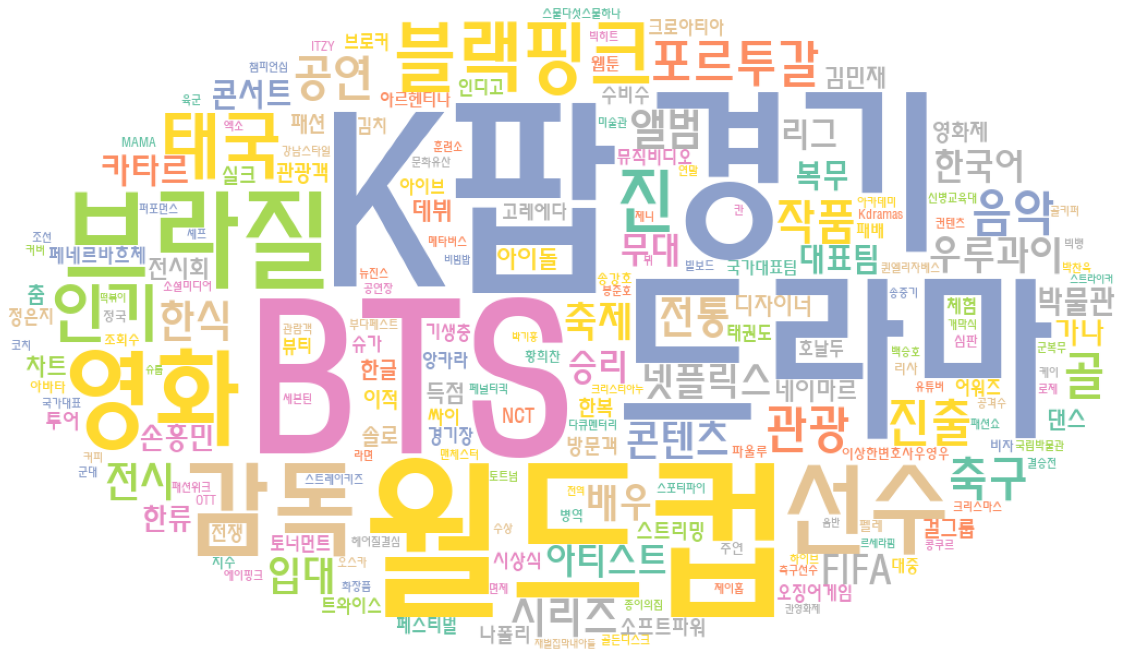

In [32]:
##원 모양으로 워드클라우드

from PIL import Image
import numpy as np
from wordcloud import WordCloud
from collections import Counter

count = Counter(final_dict)
word = count.most_common(200)

im = Image.open('mask.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, background_color='white', colormap='Set2',width=2000, height=1000, mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)
wc.to_file('2022_12.png')
plt.axis('off')
plt.show()

In [33]:
# End of File